<a href="https://colab.research.google.com/github/BooEiEi/project/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #นำเข้า pandas แทนที่ด้วย pd
import os# os ใช้จัดการกับไฟล์ ว่าอยู่ที่ไหน
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive #นำเข้าข้อมูลจาก drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/project'# ชี้ dirve ที่เราต้องการ
import missingno as mno
from sklearn import linear_model
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv(os.path.join(path, 'youth.csv'))
data

,No.,LabNo,Sex,AgeSYear,Enose,Overall,Body shape age,Kidney,Heart,Liver,...,071_HbA1c,CK,LD-P,AMY7,TP1,DBIL,TBIL,ALB1,GGT,homocysteine
0,1.0,NaN,2,41.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.8,79.0,231.0,59.0,7.16,0.10,0.30,4.48,11.0,10.88
1,2.0,201807163166.00,1,49.0,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.11
2,3.0,201807163167,1,44.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.6,85.0,175.0,104.0,7.43,0.15,1.26,4.70,15.0,11.94
3,4.0,201807163168,2,37.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.01
4,5.0,201807163169,2,38.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5.4,57.0,177.0,89.0,7.11,0.02,0.20,3.92,24.0,8.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,NaN,V17,2,31.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2270,NaN,V19,2,32.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2271,NaN,V20,1,28.0,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2272,NaN,V21,1,29.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data.dropna(subset=['telomere length (kb) '])

In [ ]:
data=data.drop(['No.', 'LabNo'], axis=1)

In [ ]:
data=data.drop(data.columns[2: 10], axis=1)

#percent missing value

In [ ]:
missing = data.isna().sum()
missing

Sex                          0
AgeSYear                     0
telomere length (kb)         0
DHEAs (BRIA)               218
Weight                       8
Height                       8
BMI                          8
Systolic                     8
Diastolic                    9
HeartRate                   51
SMM                        225
Fat Mass                   225
% Body fat                 225
waist to hip radio         225
abdominal circumference    226
visceral fat area          225
001_Glucose                  1
002_BUN                      0
003_Creatinine               0
004_Uric Acid               93
005_Cholesterol              0
006_Triglyceride             0
008_HDL-C                    0
009_LDL                      0
010_AST                      0
012_ALT                      1
013_Alkaline Phos           29
071_HbA1c                  167
CK                         249
LD-P                       249
AMY7                       249
TP1                        249
DBIL    

In [ ]:
data.isna().mean().round(4)*100

Sex                         0.00
AgeSYear                    0.00
telomere length (kb)        0.00
DHEAs (BRIA)               51.54
Weight                      1.89
Height                      1.89
BMI                         1.89
Systolic                    1.89
Diastolic                   2.13
HeartRate                  12.06
SMM                        53.19
Fat Mass                   53.19
% Body fat                 53.19
waist to hip radio         53.19
abdominal circumference    53.43
visceral fat area          53.19
001_Glucose                 0.24
002_BUN                     0.00
003_Creatinine              0.00
004_Uric Acid              21.99
005_Cholesterol             0.00
006_Triglyceride            0.00
008_HDL-C                   0.00
009_LDL                     0.00
010_AST                     0.00
012_ALT                     0.24
013_Alkaline Phos           6.86
071_HbA1c                  39.48
CK                         58.87
LD-P                       58.87
AMY7      

#Cleaning

In [ ]:
data=data.drop(data.columns[28:37], axis=1)

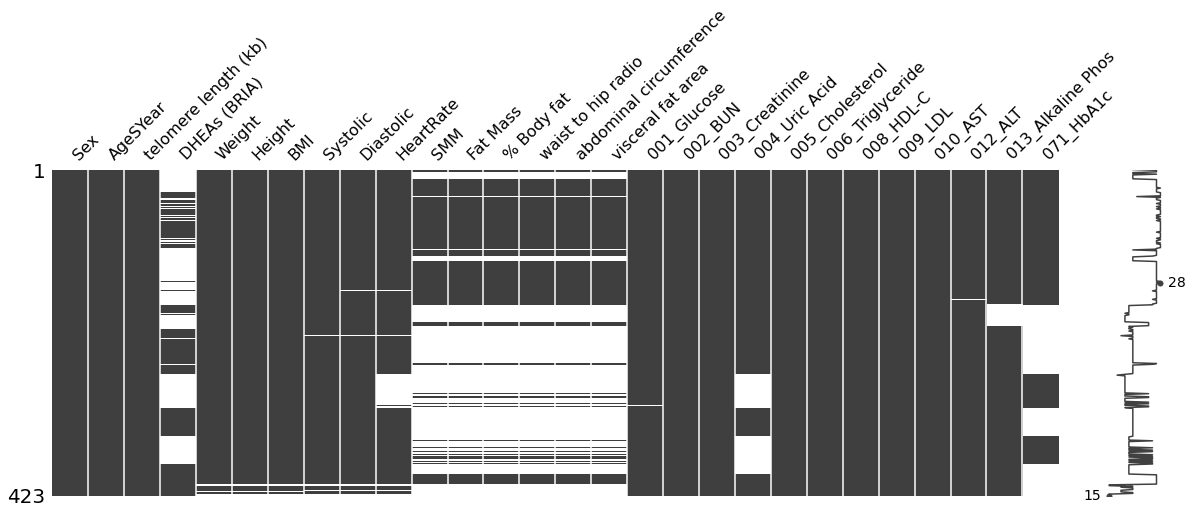

In [ ]:
mno.matrix(data, figsize = (20, 6))

In [ ]:
data = data.dropna(subset=['Diastolic'])
data = data.dropna(subset=['BMI'])
data = data.dropna(subset=['012_ALT'])
data = data.dropna(subset=['001_Glucose'])

In [ ]:
data=data.drop(data.columns[10:16], axis=1)

In [ ]:
data=data.drop(data.columns[3], axis=1)

In [ ]:
data.head()

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,001_Glucose,...,003_Creatinine,004_Uric Acid,005_Cholesterol,006_Triglyceride,008_HDL-C,009_LDL,010_AST,012_ALT,013_Alkaline Phos,071_HbA1c
49,2,58.0,7.30,47.2,156.0,19.4,112.0,64.0,70.0,100.0,...,0.6,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.8
56,2,57.0,6.36,47.4,153.0,20.2,114.0,75.0,69.0,81.0,...,1.0,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.1
85,2,24.0,9.71,53.2,157.0,21.6,103.0,69.0,78.0,79.0,...,0.8,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.4
103,2,62.0,6.17,54.4,165.0,20.0,95.0,75.0,83.0,89.0,...,0.7,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.6
107,2,86.0,4.55,49.0,154.0,20.7,129.0,79.0,83.0,108.0,...,0.7,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.2


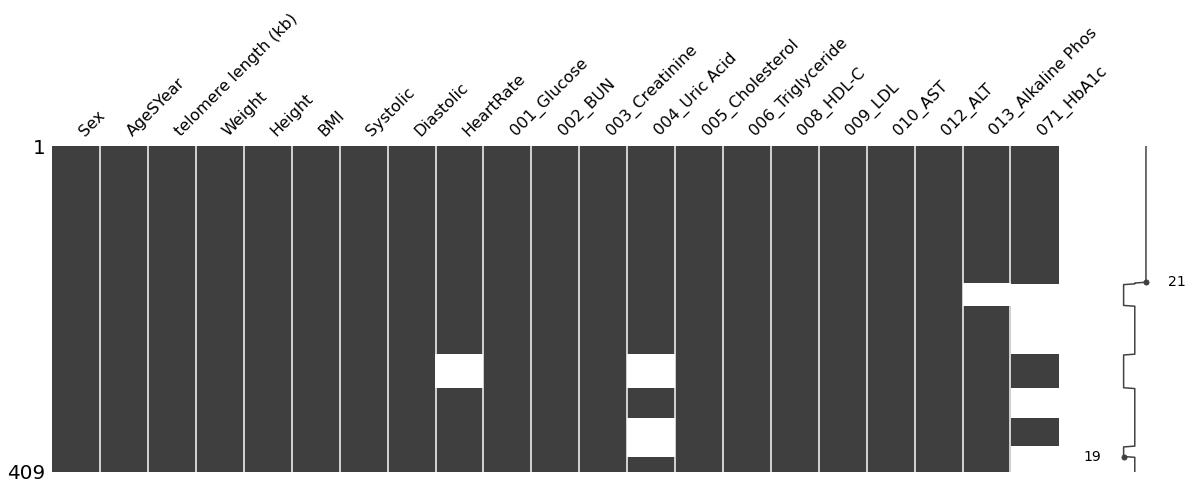

In [ ]:
mno.matrix(data, figsize = (20, 6))

In [ ]:
data.isna().mean().round(4)*100

Sex                       0.00
AgeSYear                  0.00
telomere length (kb)      0.00
Weight                    0.00
Height                    0.00
BMI                       0.00
Systolic                  0.00
Diastolic                 0.00
HeartRate                10.27
001_Glucose               0.00
002_BUN                   0.00
003_Creatinine            0.00
004_Uric Acid            22.25
005_Cholesterol           0.00
006_Triglyceride          0.00
008_HDL-C                 0.00
009_LDL                   0.00
010_AST                   0.00
012_ALT                   0.00
013_Alkaline Phos         7.09
071_HbA1c                38.39
dtype: float64

##imputing 

In [ ]:
data22 = data[["001_Glucose", "071_HbA1c"]]
data22

,001_Glucose,071_HbA1c
49,100.0,5.8
56,81.0,5.1
85,79.0,5.4
103,89.0,5.6
107,108.0,6.2
...,...,...
2259,83.0,NaN
2261,91.0,NaN
2262,75.0,NaN
2267,82.0,NaN


In [ ]:
data22.isnull().sum()

001_Glucose      0
071_HbA1c      157
dtype: int64

In [ ]:
test_data = data22[data22['071_HbA1c'].isnull()]
test_data

,001_Glucose,071_HbA1c
832,63.0,NaN
833,81.0,NaN
835,86.0,NaN
840,89.0,NaN
843,89.0,NaN
...,...,...
2259,83.0,NaN
2261,91.0,NaN
2262,75.0,NaN
2267,82.0,NaN


In [ ]:
data22.dropna(inplace=True)
data22

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,001_Glucose,071_HbA1c
49,100.0,5.8
56,81.0,5.1
85,79.0,5.4
103,89.0,5.6
107,108.0,6.2
...,...,...
2109,95.0,6.7
2111,88.0,5.9
2112,89.0,5.1
2114,80.0,5.5


In [ ]:
y_train = data22['071_HbA1c']
y_train

49      5.8
56      5.1
85      5.4
103     5.6
107     6.2
       ... 
2109    6.7
2111    5.9
2112    5.1
2114    5.5
2117    5.5
Name: 071_HbA1c, Length: 252, dtype: float64

In [ ]:
X_train = data22.drop('071_HbA1c', axis=1)
X_train

,001_Glucose
49,100.0
56,81.0
85,79.0
103,89.0
107,108.0
...,...
2109,95.0
2111,88.0
2112,89.0
2114,80.0


In [ ]:
X_train.shape

(252, 1)

###Build model "071_HbA1c"

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

###Create the X_test from the test_data

In [ ]:
X_test = test_data.drop('071_HbA1c', axis = 1)
X_test

,001_Glucose
832,63.0
833,81.0
835,86.0
840,89.0
843,89.0
...,...
2259,83.0
2261,91.0
2262,75.0
2267,82.0


### Apply the model on X_test

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([4.58508242, 5.40573826, 5.63369821, 5.77047419, 5.77047419,
       5.31455428, 5.08659432, 5.67929021, 5.90725016, 5.86165817,
       5.49692224, 5.36014627, 5.40573826, 5.63369821, 5.17777831,
       5.45133025, 5.63369821, 5.26896229, 5.40573826, 5.58810622,
       5.36014627, 5.31455428, 5.26896229, 5.04100233, 5.2233703 ,
       5.45133025, 5.49692224, 6.27198609, 6.08961812, 5.58810622,
       5.40573826, 6.08961812, 5.40573826, 5.2233703 , 5.26896229,
       6.59113003, 6.08961812, 5.40573826, 6.77349799, 6.08961812,
       5.2233703 , 6.27198609, 4.90422636, 5.13218631, 5.81606618,
       5.36014627, 5.54251423, 5.58810622, 5.13218631, 5.58810622,
       5.54251423, 6.08961812, 5.36014627, 5.31455428, 5.26896229,
       5.58810622, 5.31455428, 5.2233703 , 5.45133025, 5.2233703 ,
       5.40573826, 5.90725016, 5.40573826, 5.67929021, 6.2263941 ,
       5.45133025, 5.77047419, 5.45133025, 5.81606618, 7.04704994,
       5.36014627, 5.45133025, 5.7248822 , 5.26896229, 5.36014

In [ ]:
y_pred.shape

(157,)

###Replace the missing values predicted values

In [ ]:
test_data.loc[test_data['071_HbA1c'].isna(), '071_HbA1c'] = y_pred
#test_data['071_HbA1c'] = y_pred
test_data

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,001_Glucose,071_HbA1c
832,63.0,4.585082
833,81.0,5.405738
835,86.0,5.633698
840,89.0,5.770474
843,89.0,5.770474
...,...,...
2259,83.0,5.496922
2261,91.0,5.861658
2262,75.0,5.132186
2267,82.0,5.451330


In [ ]:
data.loc[data['071_HbA1c'].isna(), '071_HbA1c'] = y_pred


In [ ]:
data

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,001_Glucose,...,003_Creatinine,004_Uric Acid,005_Cholesterol,006_Triglyceride,008_HDL-C,009_LDL,010_AST,012_ALT,013_Alkaline Phos,071_HbA1c
49,2,58.0,7.30,47.2,156.0,19.4,112.0,64.0,70.0,100.0,...,0.6,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.800000
56,2,57.0,6.36,47.4,153.0,20.2,114.0,75.0,69.0,81.0,...,1.0,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.100000
85,2,24.0,9.71,53.2,157.0,21.6,103.0,69.0,78.0,79.0,...,0.8,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.400000
103,2,62.0,6.17,54.4,165.0,20.0,95.0,75.0,83.0,89.0,...,0.7,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.600000
107,2,86.0,4.55,49.0,154.0,20.7,129.0,79.0,83.0,108.0,...,0.7,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,2,25.0,8.35,58.9,168.0,20.9,111.0,72.0,69.0,83.0,...,0.5,4.6,232.0,42.0,60.0,163.0,20.0,22.0,31.0,5.496922
2261,1,39.0,7.72,54.0,163.0,20.3,106.0,61.0,72.0,91.0,...,1.0,7.1,182.0,121.0,38.0,120.0,20.0,19.0,53.0,5.861658
2262,2,31.0,8.54,52.0,155.0,21.6,122.0,76.0,55.0,75.0,...,0.6,3.1,184.0,39.0,80.0,96.0,25.0,7.0,51.0,5.132186
2267,2,25.0,8.98,47.0,165.0,17.3,104.0,63.0,89.0,82.0,...,0.6,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,5.451330


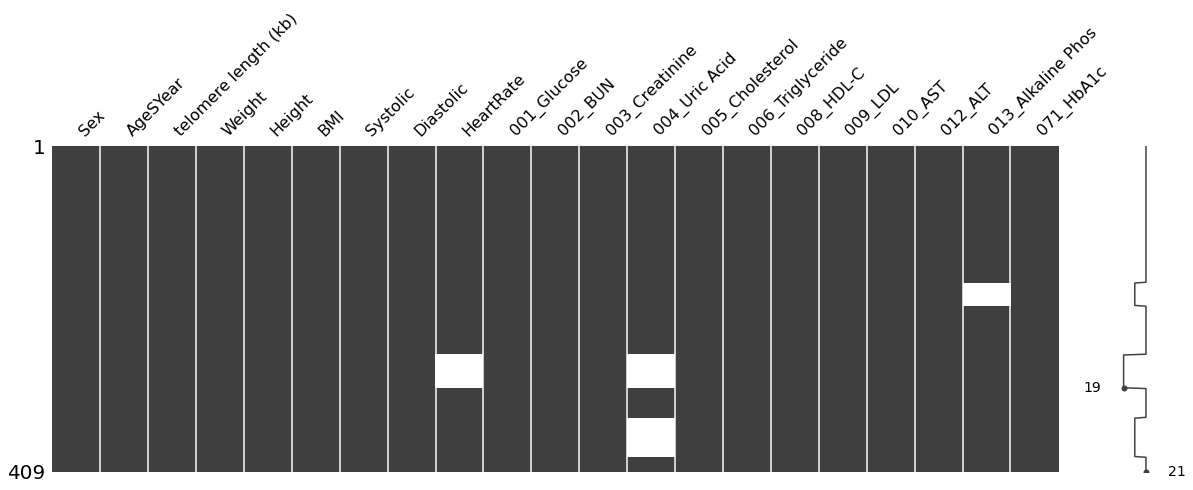

In [ ]:
mno.matrix(data, figsize = (20, 6))

###Build model "HeartRate"

In [33]:
data33 = data.dropna()
data33

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,001_Glucose,...,003_Creatinine,004_Uric Acid,005_Cholesterol,006_Triglyceride,008_HDL-C,009_LDL,010_AST,012_ALT,013_Alkaline Phos,071_HbA1c
49,2,58.0,7.30,47.2,156.0,19.4,112.0,64.0,70.0,100.0,...,0.6,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.800000
56,2,57.0,6.36,47.4,153.0,20.2,114.0,75.0,69.0,81.0,...,1.0,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.100000
85,2,24.0,9.71,53.2,157.0,21.6,103.0,69.0,78.0,79.0,...,0.8,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.400000
103,2,62.0,6.17,54.4,165.0,20.0,95.0,75.0,83.0,89.0,...,0.7,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.600000
107,2,86.0,4.55,49.0,154.0,20.7,129.0,79.0,83.0,108.0,...,0.7,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,2,25.0,8.35,58.9,168.0,20.9,111.0,72.0,69.0,83.0,...,0.5,4.6,232.0,42.0,60.0,163.0,20.0,22.0,31.0,5.496922
2261,1,39.0,7.72,54.0,163.0,20.3,106.0,61.0,72.0,91.0,...,1.0,7.1,182.0,121.0,38.0,120.0,20.0,19.0,53.0,5.861658
2262,2,31.0,8.54,52.0,155.0,21.6,122.0,76.0,55.0,75.0,...,0.6,3.1,184.0,39.0,80.0,96.0,25.0,7.0,51.0,5.132186
2267,2,25.0,8.98,47.0,165.0,17.3,104.0,63.0,89.0,82.0,...,0.6,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,5.451330


In [34]:
data33.corr()

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,001_Glucose,...,003_Creatinine,004_Uric Acid,005_Cholesterol,006_Triglyceride,008_HDL-C,009_LDL,010_AST,012_ALT,013_Alkaline Phos,071_HbA1c
Sex,1.000000,-0.051040,0.261849,-0.630014,-0.700022,-0.279690,-0.320953,-0.250976,0.105160,-0.201547,...,-0.638453,-0.655359,0.021266,-0.207203,0.298317,-0.045223,-0.337557,-0.218193,-0.209269,-0.053967
AgeSYear,-0.051040,1.000000,-0.826517,0.060459,-0.150080,0.208319,0.320583,0.170625,-0.277471,0.335225,...,0.112568,0.011041,0.247123,0.181667,-0.037141,0.211999,0.068042,0.183747,0.232227,0.284470
telomere length (kb),0.261849,-0.826517,1.000000,-0.185547,-0.091788,-0.177132,-0.290190,-0.140651,0.302627,-0.260323,...,-0.243484,-0.164233,-0.269979,-0.164818,0.021399,-0.237106,-0.128607,-0.232673,-0.242452,-0.229613
Weight,-0.630014,0.060459,-0.185547,1.000000,0.701980,0.801340,0.332005,0.338361,-0.116715,0.258538,...,0.419218,0.553556,0.142454,0.290444,-0.324563,0.203393,0.309005,0.069639,0.152503,0.080296
Height,-0.700022,-0.150080,-0.091788,0.701980,1.000000,0.142762,0.218696,0.259935,-0.014713,0.075503,...,0.490362,0.522113,0.058839,0.116974,-0.227866,0.134172,0.189379,0.125324,0.085879,-0.020657
BMI,-0.279690,0.208319,-0.177132,0.801340,0.142762,1.000000,0.280185,0.255547,-0.144456,0.305703,...,0.167670,0.319283,0.142673,0.305828,-0.266996,0.167795,0.254230,-0.020749,0.139620,0.136359
Systolic,-0.320953,0.320583,-0.290190,0.332005,0.218696,0.280185,1.000000,0.642906,-0.014051,0.274551,...,0.218341,0.228464,0.106395,0.257038,-0.182318,0.105297,0.139024,0.093834,0.233427,0.113052
Diastolic,-0.250976,0.170625,-0.140651,0.338361,0.259935,0.255547,0.642906,1.000000,0.113105,0.164831,...,0.207893,0.277509,0.129732,0.194007,-0.073673,0.101227,0.161974,-0.014492,0.143235,0.079078
HeartRate,0.105160,-0.277471,0.302627,-0.116715,-0.014713,-0.144456,-0.014051,0.113105,1.000000,-0.016415,...,-0.064571,-0.027365,-0.099439,-0.005090,-0.001485,-0.109600,-0.036369,-0.009153,-0.091557,-0.062700
001_Glucose,-0.201547,0.335225,-0.260323,0.258538,0.075503,0.305703,0.274551,0.164831,-0.016415,1.000000,...,0.077216,0.115061,0.123937,0.194950,-0.144462,0.125083,0.059382,0.054447,0.121228,0.390614
